In [ ]:

import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
from src import log


class Problem(object):
    '''The base problem class, which generates the random problem and supports function value and gradient evaluation'''

    def __init__(self, n_agent=20, m=1000, dim=40, graph_type='er', graph_params=None, regularization=None, r=0, dataset='random', sort=False, shuffle=False, normalize_data=False, gpu=False):

        self.n_agent = n_agent          # Number of agents
        self.m = m                      # Number of samples per agent
        self.dim = dim                  # Dimension of the variable
        self.X_total = None             # All data
        self.Y_total = None             # All labels
        self.X = []                     # Distributed data
        self.Y = []                     # Distributed labels
        self.x_0 = None                 # The true varibal value
        self.x_min = None               # The minimizer varibal value
        self.f_min = None               # The optimal function value
        self.L = None                   # The smoothness constant
        self.sigma = 0                  # The strong convexity constant
        self.is_smooth = True           # If the problem is smooth or not
        self.r = r
        self.graph_params = graph_params
        self.graph_type = graph_type
        self.dataset = dataset


        self.generate_graph(graph_type=graph_type, params=graph_params)

       
   
   
    def generate_graph(self, graph_type='expander', params=None):
        '''Generate connected connectivity graph according to the params.'''

        if graph_type == 'expander':
            G = nx.paley_graph(self.n_agent).to_undirected()
        elif graph_type == 'grid':
            G = nx.grid_2d_graph(*params)
        elif graph_type == 'cycle':
            G = nx.cycle_graph(self.n_agent)
        elif graph_type == 'path':
            G = nx.path_graph(self.n_agent)
        elif graph_type == 'star':
            G = nx.star_graph(self.n_agent - 1)
        elif graph_type == 'er':
            if params < 2 / (self.n_agent - 1):
                log.fatal("Need higher probability to create a connected E-R graph!")
            G = None
            while G is None or nx.is_connected(G) is False:
                G = nx.erdos_renyi_graph(self.n_agent, params)
        else:
            log.fatal('Graph type %s not supported' % graph_type)

        self.n_edges = G.number_of_edges()
        self.G = G

    def plot_graph(self):
        '''Plot the generated connectivity graph.'''

        plt.figure()
        nx.draw(self.G)









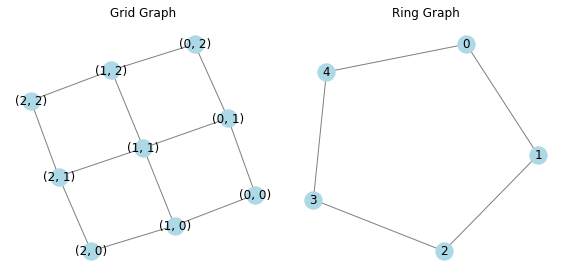

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a 2D grid graph
grid_graph = nx.grid_graph([3, 3])

# Create a ring graph
ring_graph = nx.cycle_graph(5)

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the grid graph
ax = axes[0]
ax.set_title('Grid Graph')
nx.draw(grid_graph, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray')

# Plot the ring graph
ax = axes[1]
ax.set_title('Ring Graph')
nx.draw(ring_graph, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


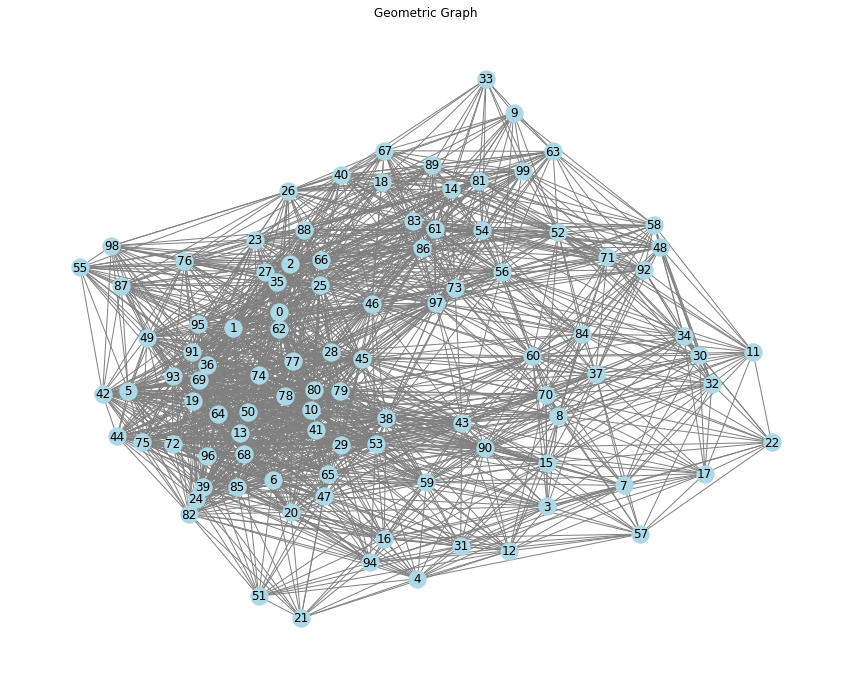

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a geometric graph
geometric_graph = nx.random_geometric_graph(100, 0.4)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(15, 12))

# Plot the geometric graph
ax.set_title('Geometric Graph')
nx.draw(geometric_graph, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()
